In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Lambda, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA

In [28]:
filepath = r"C:\Users\hp\OneDrive\Desktop\LP4\CBOW(Ass5)-20251107T143049Z-1-001\CBOW(Ass5)\CBOW.txt"
with open(filepath, 'r', encoding = 'utf-8') as f:
    text = f.read()

corpus = text.split('\n')

In [4]:
# 2) Tokenize → integer sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
# tokenizer.word_index
sequences = tokenizer.texts_to_sequences(corpus)
# print(sequences)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding index 0
# print(vocab_size)

In [15]:
# tokenizer.word_index
# print(vocab_size)
print(len(sequences))

5


In [123]:
# 3) Build CBOW training pairs (context words → target word)
window = 2
contexts, targets = [], []
for sequence in sequences:
    for i in range(window, len(sequence) - window):
        context = sequence[i - window : i] + sequence[i + 1 : i + window + 1]
        target = sequence[i]
        # print(context)
        # print(target)
        contexts.append(context)
        targets.append(target)

In [124]:
# print(contexts)
# print(targets)

In [125]:
X = np.array(contexts)                               # shape: (num_samples, 2*window)
y = to_categorical(targets, num_classes=vocab_size)  # one-hot targets

In [126]:
# print(X)

In [127]:
# print(y)

In [128]:
# 4) Tiny CBOW model: Embedding → mean → softmax
embed_dim = 10
model = Sequential()
model.add(Embedding(input_dim= vocab_size, output_dim=embed_dim))
model.add(Lambda(lambda t: tf.reduce_mean(t, axis = 1)))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
adam = Adam(0.001)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
model.fit(X, y, epochs = 100, verbose = 0)

In [38]:
train_loss, train_accuracy = model.evaluate(X, y)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0269 - loss: 4.6348


In [40]:
print(f"Loss: {train_loss:.2f}")
print(f"Accuracy: {train_accuracy*100:.2f}")

Loss: 4.63
Accuracy: 2.69


In [130]:
# 5) Extract learned word vectors
W = model.layers[0].get_weights()[0]

In [131]:
reduced = PCA(n_components = 2).fit_transform(W)
# reduced

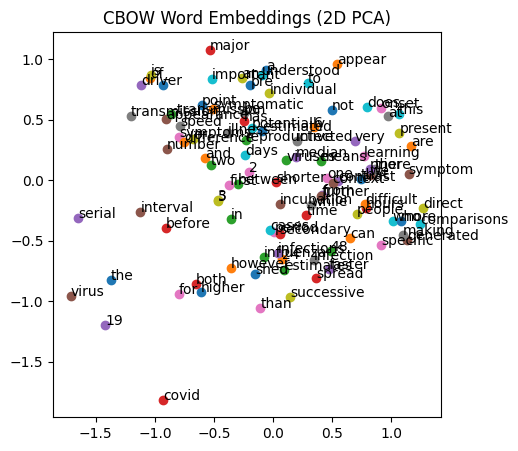

In [ ]:
plt.figure(figsize=(5, 5))

for word, ind in tokenizer.word_index.items():
    x1, y1 = reduced[ind]
    plt.scatter(x1, y1)
    plt.annotate(word, (x1, y1))

plt.title("CBOW Word Embeddings (2D PCA)")
plt.show()

In [136]:
reverse_index = {v: k for k, v in tokenizer.word_index.items()}

# choose a sentence and pick the middle word
test_sentence = "In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission.".lower().split()
center_index = test_sentence.index("people")

# Build test context (2 left + 2 right)
context_words = test_sentence[center_index - 2:center_index] + test_sentence[center_index + 1:center_index + 3]
context_ids = np.array([[tokenizer.word_index[w] for w in context_words]])

print("\nContext words:", context_words)

# Predict center word
pred = model.predict(context_ids, verbose=0)
predicted_id = np.argmax(pred)
print("Predicted center word:", reverse_index[predicted_id])


Context words: ['there', 'are', 'who', 'can']
Predicted center word: this
